# **Customer Attrition Study**

## Objectives

* Answer business requirement 1:
    * The client would like to better understand the patterns in the customer base so that the client can learn the variables of a prospect least likely to             attrition. 

## Inputs

* outputs/datasets/collection/BankChurners.csv

## Outputs

* Generate code and seaborn plots that answer business requirement 1 and can be used for the Streamlit App


---

# Change working directory

* Need to change working directory from the current jupyter_notebooks folder to the parent folder in order to access the whole project

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/creditcard-churn/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/creditcard-churn'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/BankChurners.csv")
        .drop(['CLIENTNUM'], axis=1)
        )
df.head(3)

,Unnamed: 0,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


# Data Exploration #

We wish to become familiar with the dataset, check variable types and their distribution, check for any missing data, and to understand what these variables mean in the business context

In [ ]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe

---

# Correlation study

Can use `OrdinalEncoder` to transform categorical variables into integer values, this is so they can be correlated to `Attrition_Flag`. Firstly, determining the categeorical variables:

In [18]:
cols = df.columns[df.dtypes=='object'].to_list()
df_oe = df.copy()

for col in cols:
    print(col)
    print(df[col].unique())

Gender
['M' 'F']
Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']


Some of these variables, such as `Education_level`, have a ranking. This ordering will be assigned using preset lists for `OrdinalEncoder`'s `categories` argument

In [31]:
from sklearn.preprocessing import OrdinalEncoder

cat_list = [['M', 'F'],
            ['Uneducated', 'High School', 'College',
            'Unknown', 'Graduate', 'Post-Graduate',
            'Doctorate'],
            ['Single', 'Unknown', 'Divorced', 'Married'],
            ['Less than $40K', '$40K - $60K', 'Unknown',
            '$60K - $80K', '$80K - $120K', '$120K +'],
            ['Blue', 'Silver', 'Gold', 'Platinum']]

encoder = OrdinalEncoder(categories=cat_list)
encoded_array = encoder.fit_transform(df[cols])

for i, col in enumerate(cols):
    df_oe[col] = encoded_array[:,i]

df_oe.head(3)

,Unnamed: 0,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0,0,45,0.0,3,1.0,3.0,3.0,0.0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,0,49,1.0,5,4.0,0.0,0.0,0.0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,2,0,51,0.0,3,4.0,3.0,4.0,0.0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


Use `.corr()` for both `spearman` and `pearson` to investigate the top 10 correlations for each method by returning a dataframe ordered in descending order of correlation coefficient, with the correlation between target and itself excluded.

In [32]:
corr_spearman = df_oe.corr(method='spearman')['Attrition_Flag'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2   -0.636359
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0.636041
Total_Trans_Ct                                                                                                                       -0.376115
Total_Ct_Chng_Q4_Q1                                                                                                                  -0.312059
Total_Revolving_Bal                                                                                                                  -0.240551
Avg_Utilization_Ratio                                                                                                                -0.240385
Total_Trans_Amt                                                                                                                      -0.223782

The same for `pearson`

In [33]:
corr_pearson = df_oe.corr(method='pearson')['Attrition_Flag'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0.999989
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2   -0.999989
Total_Trans_Ct                                                                                                                       -0.371403
Total_Ct_Chng_Q4_Q1                                                                                                                  -0.290054
Total_Revolving_Bal                                                                                                                  -0.263053
Contacts_Count_12_mon                                                                                                                 0.204491
Avg_Utilization_Ratio                                                                                                                -0.178410

We notice that redundant variables that were included by the dataset uploader, as well as variables related to customer account usage are the most correlated variables. As such, we drop these to only include variables available for a prospect.

In [38]:
df_oe_dropped = df_oe.drop(['Unnamed: 0',
                            'Months_on_book', 
                            'Months_Inactive_12_mon',
                            'Contacts_Count_12_mon',
                            'Total_Revolving_Bal',
                            'Avg_Open_To_Buy',
                            'Total_Amt_Chng_Q4_Q1',
                            'Total_Trans_Amt',
                            'Total_Trans_Ct',
                            'Total_Ct_Chng_Q4_Q1',
                            'Avg_Utilization_Ratio',
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

df_oe_dropped.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit
0,0,45,0.0,3,1.0,3.0,3.0,0.0,5,12691.0
1,0,49,1.0,5,4.0,0.0,0.0,0.0,6,8256.0
2,0,51,0.0,3,4.0,3.0,4.0,0.0,4,3418.0
3,0,40,1.0,4,1.0,1.0,0.0,0.0,3,3313.0
4,0,40,0.0,3,0.0,3.0,3.0,0.0,5,4716.0


We now repeat the correlation methods for the dataset with the usage and redundant variables dropped

In [39]:
corr_spearman = df_oe_dropped.corr(method='spearman')['Attrition_Flag'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

Total_Relationship_Count   -0.149674
Credit_Limit               -0.050910
Gender                      0.037272
Marital_Status             -0.023361
Dependent_count             0.020983
Customer_Age                0.017508
Education_Level             0.016380
Income_Category            -0.015457
Card_Category              -0.002853
Name: Attrition_Flag, dtype: float64

In [40]:
corr_pearson = df_oe_dropped.corr(method='pearson')['Attrition_Flag'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

Total_Relationship_Count   -0.150005
Gender                      0.037272
Credit_Limit               -0.023873
Marital_Status             -0.023485
Dependent_count             0.018991
Education_Level             0.018638
Customer_Age                0.018203
Income_Category            -0.012748
Card_Category               0.002354
Name: Attrition_Flag, dtype: float64

It appears that most variables that would be available for a prospect have very weak correlation to attrition, with only `Total_Relationship_Count` having any appreciably high correlation at all. We will consider the top 5 correlated variables presented here and study the distribution of them within attritioned customers.

In [41]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'Credit_Limit',
 'Dependent_count',
 'Gender',
 'Marital_Status',
 'Total_Relationship_Count'}

Therefore we will study the following variables. We will investigate if:

* An attritioned customer typically has a lower credit limit
* An attritioned customer typically has more dependents
* An attritioned customer tends to be female
* An attritioned customer tends to single
* An attritioned customer tends to have less existing relationships with the bank

In [42]:
vars_to_study = ['Credit_Limit', 'Dependent_count', 'Gender', 'Marital_Status', 'Total_Relationship_Count']
vars_to_study

['Credit_Limit',
 'Dependent_count',
 'Gender',
 'Marital_Status',
 'Total_Relationship_Count']

---

# EDA on selected variables

In [43]:
df_eda = df.filter(vars_to_study + ['Attrition_Flag'])
df_eda.head()

,Credit_Limit,Dependent_count,Gender,Marital_Status,Total_Relationship_Count,Attrition_Flag
0,12691.0,3,M,Married,5,0
1,8256.0,5,F,Single,6,0
2,3418.0,3,M,Married,4,0
3,3313.0,4,F,Unknown,3,0
4,4716.0,3,M,Married,5,0


## Variables Distibution by Attrition

Plot the distributions (numerical and categorical) coloured by attrition

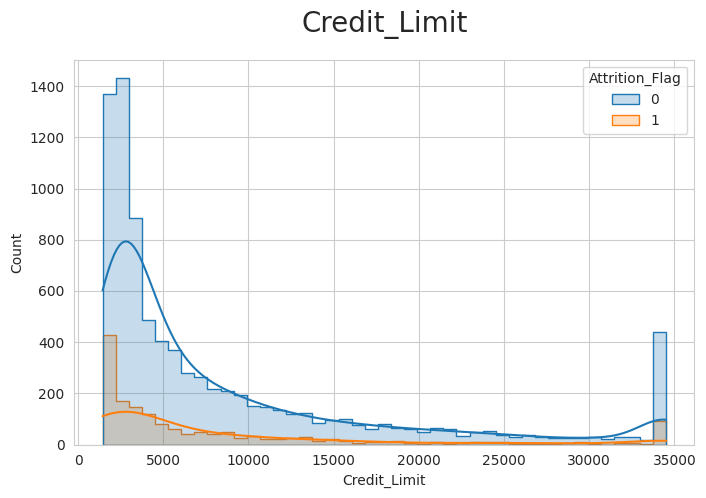

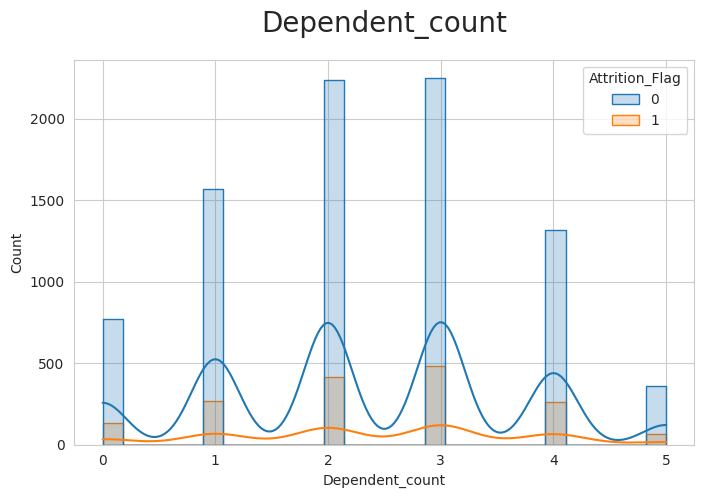

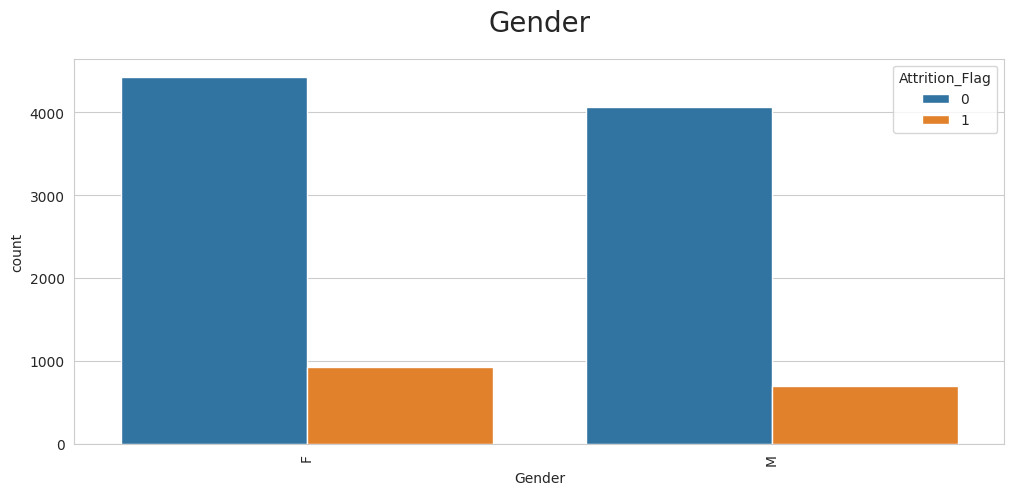

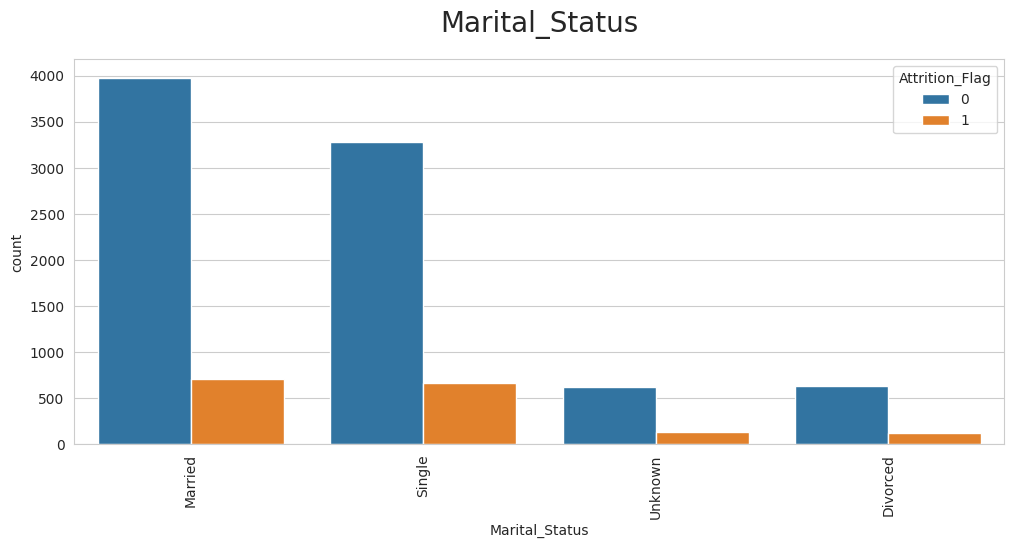

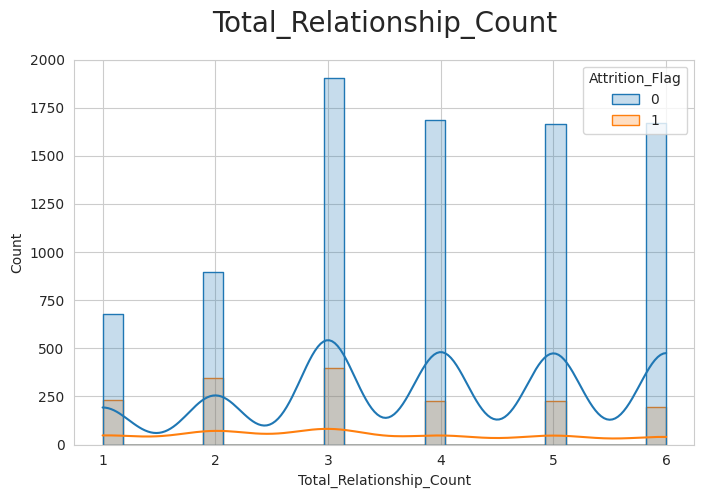

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'Attrition_Flag'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

---

## Parellel Plot

Create separate DataFrame to transform `Credit_Limit` from a numerical variable into a binned categorical variable for visualizing on a `parallel_categories()` plot

In [45]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
cred_lim_map = [-np.Inf, 7000, 14000, 21000, 28000, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'Credit_Limit': cred_lim_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

,Credit_Limit,Dependent_count,Gender,Marital_Status,Total_Relationship_Count,Attrition_Flag
0,1,3,M,Married,5,0
1,1,5,F,Single,6,0
2,0,3,M,Married,4,0
3,0,4,F,Unknown,3,0
4,0,3,M,Married,5,0


In [46]:
disc.binner_dict_['Credit_Limit']

[-inf, 7000, 14000, 21000, 28000, inf]

Create map to replace `Credit_Limit` with more informative levels

In [48]:
n_classes = len(cred_lim_map) - 1
classes_ranges = disc.binner_dict_['Credit_Limit'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{int(classes_ranges[0]/1000)}k"
    elif n == n_classes-1:
        labels_map[n] = f"+{int(classes_ranges[-1]/1000)}k"
    else:
        labels_map[n] = f"{int(classes_ranges[n-1]/1000)}k to {int(classes_ranges[n]/1000)}k"

labels_map

{0: '<7k', 1: '7k to 14k', 2: '14k to 21k', 3: '21k to 28k', 4: '+28k'}

Replace using `.replace()`

In [49]:
df_parallel['Credit_Limit'] = df_parallel['Credit_Limit'].replace(labels_map)
df_parallel.head()

,Credit_Limit,Dependent_count,Gender,Marital_Status,Total_Relationship_Count,Attrition_Flag
0,7k to 14k,3,M,Married,5,0
1,7k to 14k,5,F,Single,6,0
2,<7k,3,M,Married,4,0
3,<7k,4,F,Unknown,3,0
4,<7k,3,M,Married,5,0


Creates multi-dimensional categorical data plot

In [51]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color="Attrition_Flag")
fig.show()

---

# Conclusions

The correlations and plot interpretations converge to a certain extent, e.g. in the `Marital_Status` plot it can be observed that single customers attrition at a higher rate than married customers, on the `Total_Relationship_Count` plot customers with less relationships attrition at a higher rate than customers with more relationships. However, these correlations are shown to be very weak. The bank would be advised to collect different data that might better predict customer's tendency to attrtion. 

* An attritioned customer typically has a lower credit limit
* An attritioned customer typically has more dependents
* An attritioned customer tends to be female
* An attritioned customer tends to single
* An attritioned customer tends to have less existing relationships with the bank